## Library

In [3]:
import pandas as pd
import numpy as np
import time as time
from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib
import math

import RFCM as r_fuzzy
import KFCM as k_fuzzy
import CFCM as c_fuzzy
import csiFCM as csi_fuzzy

import sys
sys.path.append("C:/Users/Andrea/Documents/Unimib/3°anno/IA/scikit-cautious-main/metrics")
import _metrics as metrics

ModuleNotFoundError: No module named '_metrics'

## Import datas

In [3]:
main_path_dataset = "C:/Users/Andrea/Documents/Unimib/3°anno/IA/scikit-cautious-main/dataset/"
main_path_output = "C:/Users/Andrea/Documents/Unimib/3°anno/IA/scikit-cautious-main/output/"
datasetsString = ["ceramic.CSV", "crowdsourced.CSV", "ecoli.CSV", "glass.CSV", "iris.CSV", "wdbc.CSV", "wine.CSV", 
                  "winequality-red.CSV", "winequality-white.CSV", "yeast.CSV", "optdigits.CSV"]

algorithm = ["FCM_R", "KFCM", "CFCM", "csiFCM"]
algorithm_methods = ["FuzzyCMeansRobusted", "FuzzyCMeansKernelized", "FuzzyCMeansCredibilistic", "FuzzyCMeansSizeInsensitive"]
datasets_name = ["ceramic", "crowdsourced", "ecoli", "glass", "iris", "wdbc", "wine", "winequality-red", "winequality-white", "yeast", "optdigits"]

datasets_native = np.empty(len(datasetsString), dtype=object)
df = pd.DataFrame([])

for i in range(len(datasetsString)):
    df = pd.read_csv(main_path_dataset + datasetsString[i])
    datasets_native[i] = df

In [3]:
print(datasets_native[4]) #iris

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


## Separate classes and datas

In [4]:
datasets = np.empty(len(datasetsString), dtype=object)
classes = np.empty(len(datasetsString), dtype=object)
num_classes = [2, 6, 8, 7, 3, 2, 3, 9, 9, 10, 10]

#ceramic
datasets[0] = datasets_native[0].iloc[:, 2:]
classes[0] = datasets_native[0].iloc[:, 1]

#crowdsourced
datasets[1] = datasets_native[1].iloc[:, 1:]
classes[1] = datasets_native[1].iloc[:, 0]

#ecoli
datasets[2] = datasets_native[2].iloc[:, 1:8]
classes[2] = datasets_native[2].iloc[:, 8]

#glass
datasets[3] = datasets_native[3].iloc[:, 1:10]
classes[3] = datasets_native[3].iloc[:, 10]

#iris
datasets[4] = datasets_native[4].iloc[:, :4]
classes[4] = datasets_native[4].iloc[:, 4]

#wdbc
datasets[5] = datasets_native[5].iloc[:, 2:]
classes[5] = datasets_native[5].iloc[:, 1]

#wine
datasets[6] = datasets_native[6].iloc[:, 1:]
classes[6] = datasets_native[6].iloc[:, 0]

#winequality-red
datasets[7] = datasets_native[7].iloc[:, :11]
classes[7] = datasets_native[7].iloc[:, 11]

#winequality-white
datasets[8] = datasets_native[8].iloc[:, :11]
classes[8] = datasets_native[8].iloc[:, 11]

#yeast
datasets[9] = datasets_native[9].iloc[:, 1:9]
classes[9] = datasets_native[9].iloc[:, 9]

#optdigits
datasets[10] = datasets_native[10].iloc[:, :64]
classes[10] = datasets_native[10].iloc[:, 63]   

In [5]:
print(datasets[5])

     17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  0.2419  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

     0.07871  ...   25.38  

In [6]:
print(classes[5])

0      M
1      M
2      M
3      M
4      M
      ..
563    M
564    M
565    M
566    M
567    B
Name: M, Length: 568, dtype: object


## Resample

In [5]:
datasets[7], classes[7] = resample(datasets[7], classes[7], n_samples=500, replace=True, stratify=classes[7])
datasets[7] = datasets[7].reset_index().iloc[:, 1:]
classes[7] = classes[7].reset_index().iloc[:, 1]
datasets[8], classes[8] = resample(datasets[8], classes[8], n_samples=500, replace=True, stratify=classes[8])
datasets[8] = datasets[8].reset_index().iloc[:, 1:]
classes[8] = classes[8].reset_index().iloc[:, 1]
datasets[10], classes[10] = resample(datasets[10], classes[10], n_samples=500, replace=True, stratify=classes[10])
datasets[10] = datasets[10].reset_index().iloc[:, 1:]
classes[10] = classes[10].reset_index().iloc[:, 1]

In [11]:
print(datasets[5])

     17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  0.2419  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

     0.07871  ...   25.38  

In [10]:
print(classes[10])

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    1
Name: 0.25, Length: 500, dtype: int64


## Inizialize output

In [6]:
"""
averageLowUpp = pd.DataFrame(None, index = ["ceramic", "crowdsourced", "ecoli", "glass", "iris", "wdbc", "wine", "winequality-red", "winequality-white", "yeast", "optdigits"], columns = ["FCM_R","KFCM","CFCM", "csiFCM"])
averageTime = pd.DataFrame(None, index = ["ceramic", "crowdsourced", "ecoli", "glass", "iris", "wdbc", "wine", "winequality-red", "winequality-white", "yeast", "optdigits"], columns = ["FCM_R","KFCM","CFCM", "csiFCM"])
sdLowUpp = pd.DataFrame(None, index = ["ceramic", "crowdsourced", "ecoli", "glass", "iris", "wdbc", "wine", "winequality-red", "winequality-white", "yeast", "optdigits"], columns = ["FCM_R","KFCM","CFCM", "csiFCM"])
sdTime = pd.DataFrame(None, index = ["ceramic", "crowdsourced", "ecoli", "glass", "iris", "wdbc", "wine", "winequality-red", "winequality-white", "yeast", "optdigits"], columns = ["FCM_R","KFCM","CFCM", "csiFCM"])
averageLowUpp.to_csv(main_path_output+"averageLowUpp.CSV", index=True)
averageTime.to_csv(main_path_output+"averageTime.CSV", index=True)
sdLowUpp.to_csv(main_path_output+"sdLow.CSV", index=True)
sdTime.to_csv(main_path_output+"sdTime.CSV", index=True)
"""
averageLowUpp = pd.read_csv(main_path_output+"averageLowUpp.CSV", index_col=0)
averageTime = pd.read_csv(main_path_output+"averageTime.CSV", index_col=0)
sdLowUpp = pd.read_csv(main_path_output+"sdLow.CSV", index_col=0)
sdTime = pd.read_csv(main_path_output+"sdTime.CSV", index_col=0)

## Test each algorithm

In [ ]:
si = 1
n_iters = 10

#for i in range(len(datasetsString)):
i = 9
print(datasets[i].shape)

y_g = metrics.to_evidential(classes[i], num_classes[i], cluster_type='hard')
print("Executing the dataset: "+datasets_name[i])

times = []
low_upp = []
for k in range(n_iters):
    so = datasets[i].shape[0]
    start_time = time.time()
    y_res = r_fuzzy.FuzzyCMeansRobusted(num_classes[i]).fit_predict(datasets[i].to_numpy())
    y_f = metrics.to_evidential(y_res, num_classes[i], cluster_type='fuzzy')
    end_time = time.time()
    values = metrics.evid_distrib_distances(y_g, y_f, metric = metrics.dual_rand, approximate = True, samples_outer = so, samples_inner = si)
    lowupp = metrics.summary_distrib(values)
    times.append(end_time-start_time)
    low_upp.append(lowupp)  
    
averageLowUpp.at[datasets_name[i], algorithm[0]] = np.mean(low_upp)
averageTime.at[datasets_name[i], algorithm[0]] = np.mean(times)
sdLowUpp.at[datasets_name[i], algorithm[0]] = np.std(low_upp)
sdTime.at[datasets_name[i], algorithm[0]] = np.std(times)
averageLowUpp.to_csv(main_path_output+"averageLowUpp.CSV", index=True)
averageTime.to_csv(main_path_output+"averageTime.CSV", index=True)
sdLowUpp.to_csv(main_path_output+"sdLow.CSV", index=True)
sdTime.to_csv(main_path_output+"sdTime.CSV", index=True)

times = []
low_upp = []
for k in range(n_iters):
    so = datasets[i].shape[0]
    start_time = time.time()
    y_res = k_fuzzy.FuzzyCMeansKernelized(num_classes[i]).fit_predict(datasets[i].to_numpy())
    y_f = metrics.to_evidential(y_res, num_classes[i], cluster_type='fuzzy')
    end_time = time.time()
    values = metrics.evid_distrib_distances(y_g, y_f, metric = metrics.dual_rand, approximate = True, samples_outer = so, samples_inner = si)
    lowupp = metrics.summary_distrib(values)
    times.append(end_time-start_time)
    low_upp.append(lowupp)  
    
averageLowUpp.at[datasets_name[i], algorithm[1]] = np.mean(low_upp)
averageTime.at[datasets_name[i], algorithm[1]] = np.mean(times)
sdLowUpp.at[datasets_name[i], algorithm[1]] = np.std(low_upp)
sdTime.at[datasets_name[i], algorithm[1]] = np.std(times)
averageLowUpp.to_csv(main_path_output+"averageLowUpp.CSV", index=True)
averageTime.to_csv(main_path_output+"averageTime.CSV", index=True)
sdLowUpp.to_csv(main_path_output+"sdLow.CSV", index=True)
sdTime.to_csv(main_path_output+"sdTime.CSV", index=True)
    
times = []
low_upp = []
for k in range(n_iters):
    so = datasets[i].shape[0]
    start_time = time.time()
    y_res = c_fuzzy.FuzzyCMeansCredibilistic(num_classes[i]).fit_predict(datasets[i].to_numpy())
    y_f = metrics.to_evidential(y_res, num_classes[i], cluster_type='fuzzy')
    end_time = time.time()
    values = metrics.evid_distrib_distances(y_g, y_f, metric = metrics.dual_rand, approximate = True, samples_outer = so, samples_inner = si)
    lowupp = metrics.summary_distrib(values)
    times.append(end_time-start_time)
    low_upp.append(lowupp)  
    
averageLowUpp.at[datasets_name[i], algorithm[2]] = np.mean(low_upp)
averageTime.at[datasets_name[i], algorithm[2]] = np.mean(times)
sdLowUpp.at[datasets_name[i], algorithm[2]] = np.std(low_upp)
sdTime.at[datasets_name[i], algorithm[2]] = np.std(times)
averageLowUpp.to_csv(main_path_output+"averageLowUpp.CSV", index=True)
averageTime.to_csv(main_path_output+"averageTime.CSV", index=True)
sdLowUpp.to_csv(main_path_output+"sdLow.CSV", index=True)
sdTime.to_csv(main_path_output+"sdTime.CSV", index=True)

times = []
low_upp = []
for k in range(n_iters):
    so = datasets[i].shape[0]
    start_time = time.time()
    y_res = csi_fuzzy.FuzzyCMeansSizeInsensitive(num_classes[i]).fit_predict(datasets[i].to_numpy())
    y_f = metrics.to_evidential(y_res, num_classes[i], cluster_type='fuzzy')
    end_time = time.time()
    values = metrics.evid_distrib_distances(y_g, y_f, metric = metrics.dual_rand, approximate = True, samples_outer = so, samples_inner = si)
    lowupp = metrics.summary_distrib(values)
    times.append(end_time-start_time)
    low_upp.append(lowupp)  
    
averageLowUpp.at[datasets_name[i], algorithm[3]] = np.mean(low_upp)
averageTime.at[datasets_name[i], algorithm[3]] = np.mean(times)
sdLowUpp.at[datasets_name[i], algorithm[3]] = np.std(low_upp)
sdTime.at[datasets_name[i], algorithm[3]] = np.std(times)
averageLowUpp.to_csv(main_path_output+"averageLowUpp.CSV", index=True)
averageTime.to_csv(main_path_output+"averageTime.CSV", index=True)
sdLowUpp.to_csv(main_path_output+"sdLow.CSV", index=True)
sdTime.to_csv(main_path_output+"sdTime.CSV", index=True)

## Plot

In [7]:
averageLowUpp = pd.read_csv(main_path_output+"averageLowUpp.CSV", index_col=0)
averageTime = pd.read_csv(main_path_output+"averageTime.CSV", index_col=0)
sdLowUpp = pd.read_csv(main_path_output+"sdLow.CSV", index_col=0)
sdTime = pd.read_csv(main_path_output+"sdTime.CSV", index_col=0)

averageLowUpp = round(averageLowUpp, 3)
averageTime = round(averageTime, 3)
sdLowUpp = round(sdLowUpp, 3)
sdTime = round(sdTime, 3)
sdTime

,FCM_R,KFCM,CFCM,csiFCM
Dataset,,,,
ceramic,0.004,0.001,0.001,0.000
crowdsourced,0.007,0.005,0.021,0.006
ecoli,0.019,0.009,0.008,0.010
glass,0.007,0.020,0.005,0.005
iris,0.002,0.002,0.001,0.002
wdbc,0.006,0.008,0.007,0.003
wine,0.005,0.002,0.003,0.003
winequality-red,0.020,0.023,0.010,0.007
winequality-white,0.022,0.011,0.010,0.041


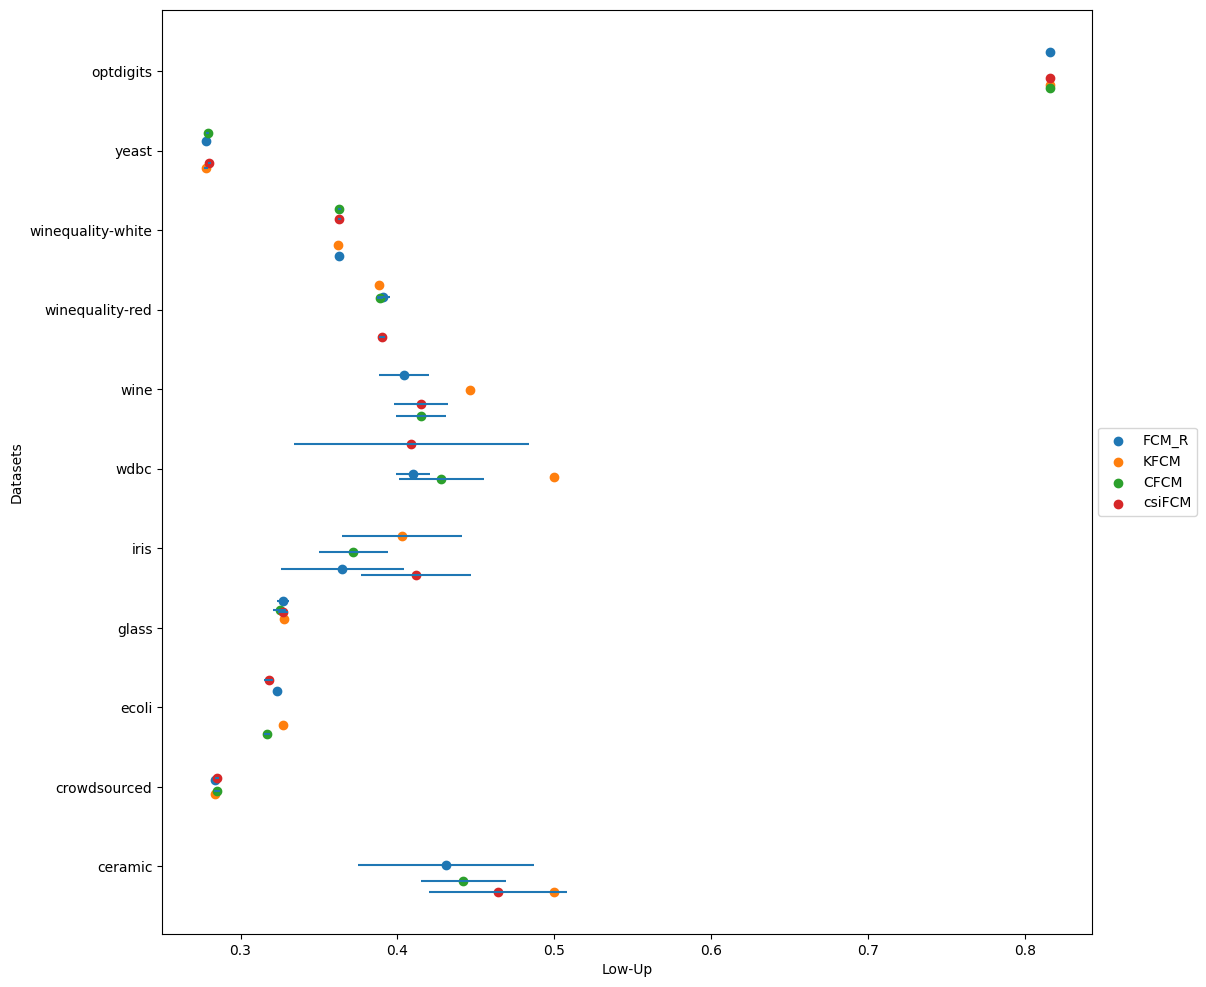

In [16]:
plt.figure(figsize=(12,12))
y = range(len(averageLowUpp.index))

for a in algorithm:
    rand = (np.random.rand(11)-0.5)*0.7
    plt.scatter(x=averageLowUpp.loc[:, a], y=y+rand, label=a)
    plt.errorbar(x=averageLowUpp.loc[:, a], y=y+rand, xerr=sdLowUpp.loc[:, a], fmt='None')
    
plt.yticks(y, averageLowUpp.index)
plt.xlabel("Low-Up")
plt.ylabel("Datasets")
plt.legend(loc="right", bbox_to_anchor=(1.12, 0.5))
plt.show()

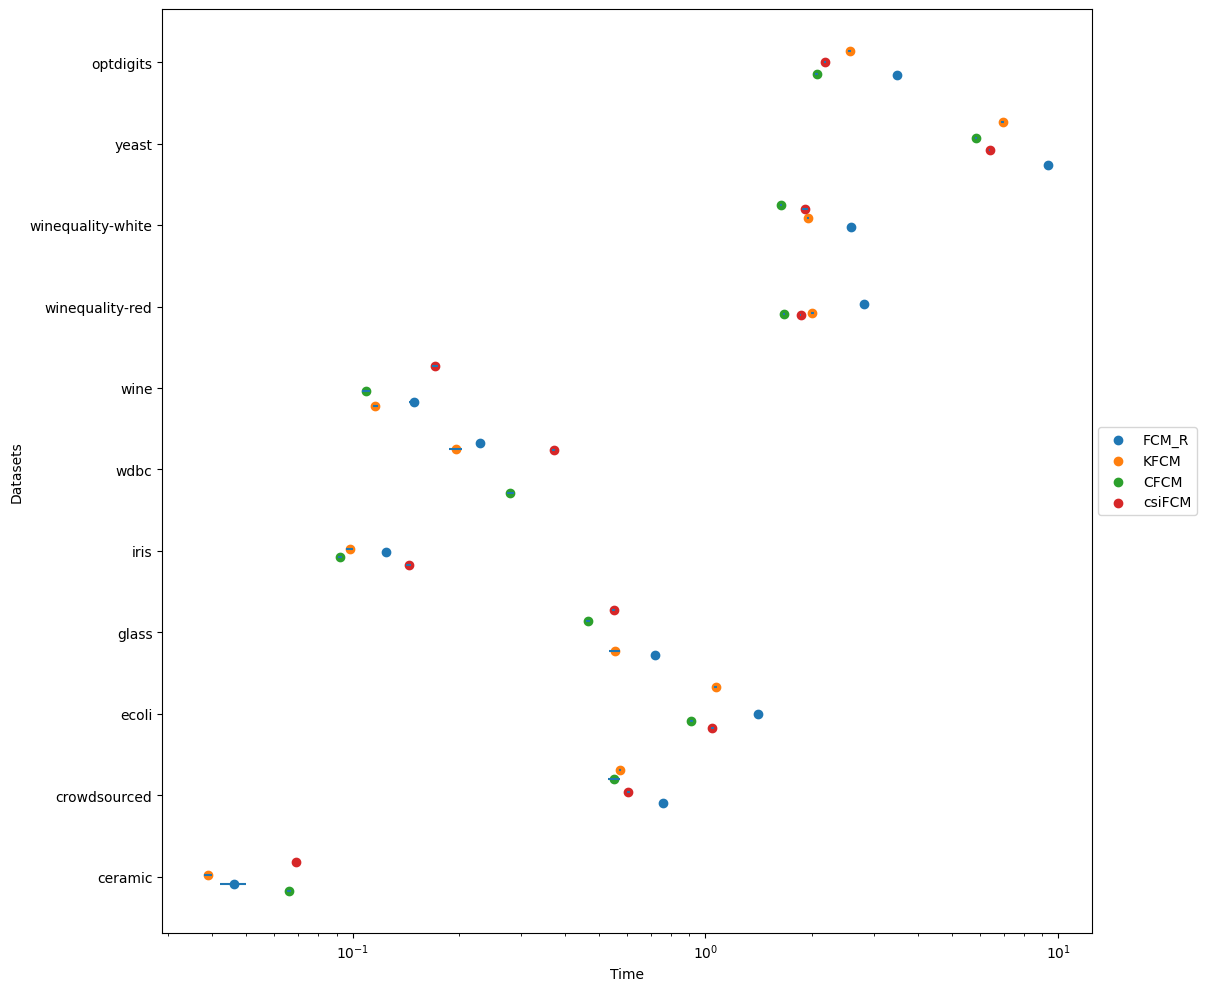

In [23]:
plt.figure(figsize=(12,12))
y = range(len(averageTime.index))

for a in algorithm:
    rand = (np.random.rand(11)-0.5)*0.7
    plt.scatter(x=averageTime.loc[:, a], y=y+rand, label=a)
    plt.errorbar(x=averageTime.loc[:, a], y=y+rand, xerr=sdTime.loc[:, a], fmt='None')
    
plt.yticks(y, averageTime.index)
plt.xscale('log')
plt.xlabel("Time")
plt.ylabel("Datasets")
plt.legend(loc="right", bbox_to_anchor=(1.12, 0.5))
plt.show()

In [6]:
def triple(a, b, c):
    l = []
    for i in range(len(a)):
        l.append(a[i]*b[i]*c[i])
    return l

def sor(x, y):
    n = len(x)
    for i in range(n):
        if math.isnan(y[i]):
            x[i] = 'nan'
    y = [v for v in y if str(v) != 'nan']
    x = [v for v in x if v != 'nan']
    n = len(x)
    for i in range(n):
        already_sorted = True

        for j in range(n - i - 1):
            if x[j] > x[j + 1]:
                x[j], x[j + 1] = x[j + 1], x[j]
                y[j], y[j + 1] = y[j + 1], y[j]
                already_sorted = False

        if already_sorted:
            break

    return x, y

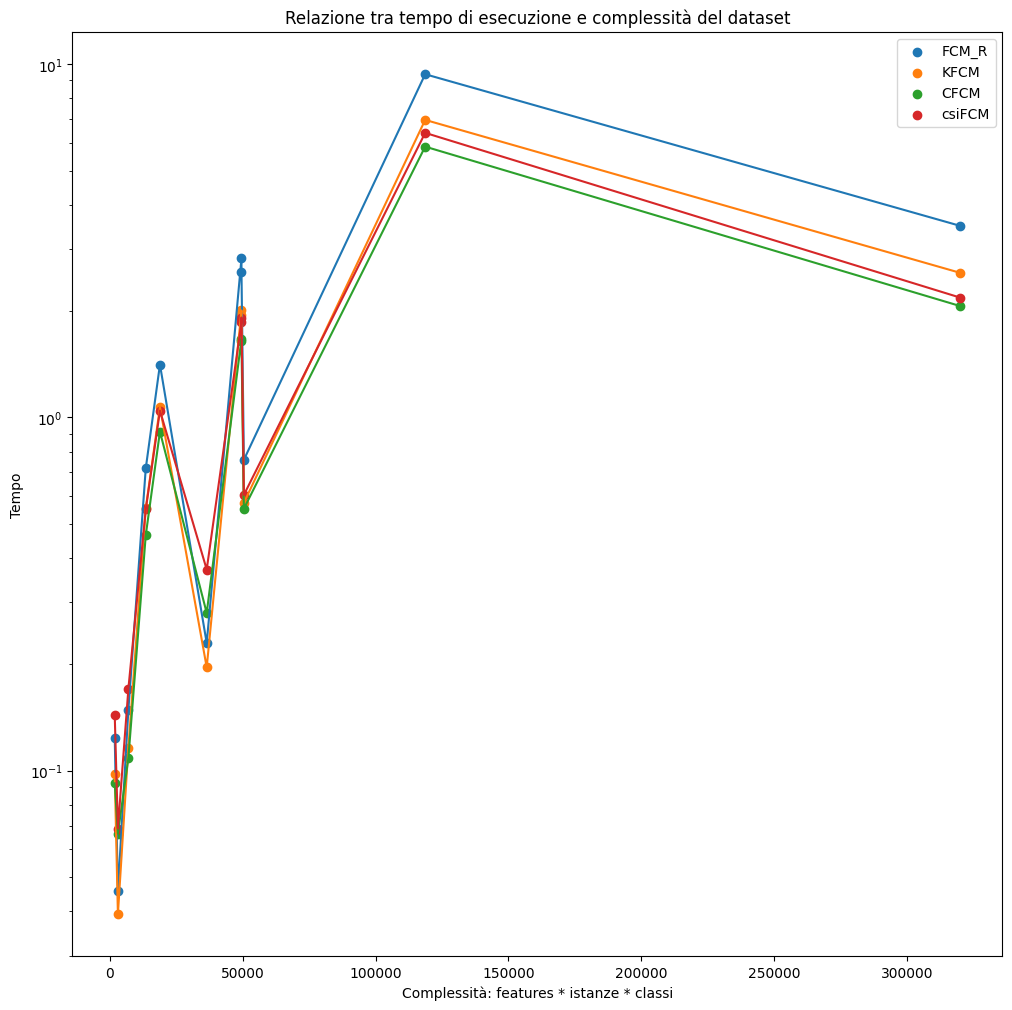

In [26]:
plt.figure(figsize=(12,12))
num_features = [17, 28, 7, 9, 4, 32, 13, 11, 11, 8, 64]
num_istances = [88, 300, 336, 214, 150, 569, 178, 500, 500, 1483, 500]

for a in algorithm:
    y = pd.read_csv(main_path_output+"averageTime.CSV", index_col=0)[a]
    x = triple(num_classes, num_features, num_istances)
    x, y = sor(x, y)
    plt.scatter(x, y, marker="o", label=a)
    plt.plot(x, y)

plt.title("Relazione tra tempo di esecuzione e complessità del dataset")
plt.xlabel("Complessità: features * istanze * classi")
plt.ylabel("Tempo")
plt.yscale('log')
plt.legend()
plt.show()

In [8]:
import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, labels=False, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.
    Needs matplotlib to work.
    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.
    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
        labels (bool, optional): if set to `True`, the calculated avg rank
        values will be displayed
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.
        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]
        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=2)

    bigtick = 0.3
    smalltick = 0.15
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=2)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="right", va="center", size=10)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + scalewidth - 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="left", va="center", size=10)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            #print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    #print(nnames)
    for clq in cliques:
        if len(clq) == 1:
            continue
        #print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05, title=None, labels=False):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

    #print(average_ranks)


    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5, labels=labels)

    font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
    if title:
        plt.title(title,fontdict=font, y=0.9, x=0.5)
    plt.savefig('cd-diagram.png',bbox_inches='tight')
    return average_ranks

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    #print(pd.unique(df_perf['classifier_name']))
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['classifier_name']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['classifier_name'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['classifier_name'] == c]['accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        #print('the null hypothesis over the entire classifiers cannot be rejected')
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_1]['accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_2]
                              ['accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stop
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['classifier_name'].isin(classifiers)]. \
        sort_values(['classifier_name', 'dataset_name'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['dataset_name']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    #print(dfff[dfff == 1.0].sum(axis=1))

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    # return the p-values and the average ranks
    return p_values, average_ranks, max_nb_datasets

C:\Users\Andrea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


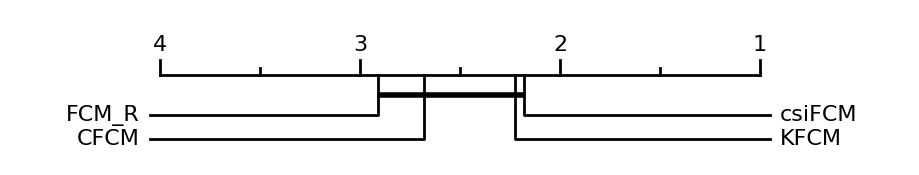

: 

In [9]:
melted = averageLowUpp.reset_index().melt(id_vars="Dataset")
melted.columns = ["dataset_name", "classifier_name", "accuracy"]
draw_cd_diagram(df_perf=melted)
plt.savefig("lower_cd.png", dpi=300, bbox_inches="tight")

In [ ]:
melted = averageTime.reset_index().melt(id_vars="Dataset")
melted.columns = ["dataset_name", "classifier_name", "accuracy"]
draw_cd_diagram(df_perf=melted)
plt.savefig("lower_cd.png", dpi=300, bbox_inches="tight")